#**Name**: Mohammad Abu Shams
#**ID**: 1200549  
#**Section**: 3  
#**Instructor**: Dr. Mohammad Jubran
#**Date**: 30/11/2024


#**Part 1: Data Cleaning and Feature Engineering for the Diabetes Dataset**


**1.1 Import Libraries**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import time

**1.2 Load the Dataset**

In [20]:
# Load the data from a CSV file into a DataFrame
df = pd.read_csv('diabetes+dataset.csv')
print(df.columns) # print the column names
print(df.head()) # show the first 5 rows to see the data

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')
                             Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Posit

**1.3 Data Exploration**

In [21]:
# 4 decimal places
pd.options.display.float_format = '{:.4f}'.format

# Display the summary statistics
print(df.describe())

       Insulin Levels        Age        BMI  Blood Pressure  \
count      70000.0000 70000.0000 70000.0000      70000.0000   
mean          21.6074    32.0207    24.7829        111.3395   
std           10.7859    21.0432     6.0142         19.9450   
min            5.0000     0.0000    12.0000         60.0000   
25%           13.0000    14.0000    20.0000         99.0000   
50%           19.0000    31.0000    25.0000        113.0000   
75%           28.0000    49.0000    29.0000        125.0000   
max           49.0000    79.0000    39.0000        149.0000   

       Cholesterol Levels  Waist Circumference  Blood Glucose Levels  \
count          70000.0000           70000.0000            70000.0000   
mean             194.8672              35.0517              160.7017   
std               44.5325               6.8035               48.1655   
min              100.0000              20.0000               80.0000   
25%              163.0000              30.0000              121.0000   


In [22]:
# Display the number of missing values
print(df.isnull().sum())

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neurological Assessm

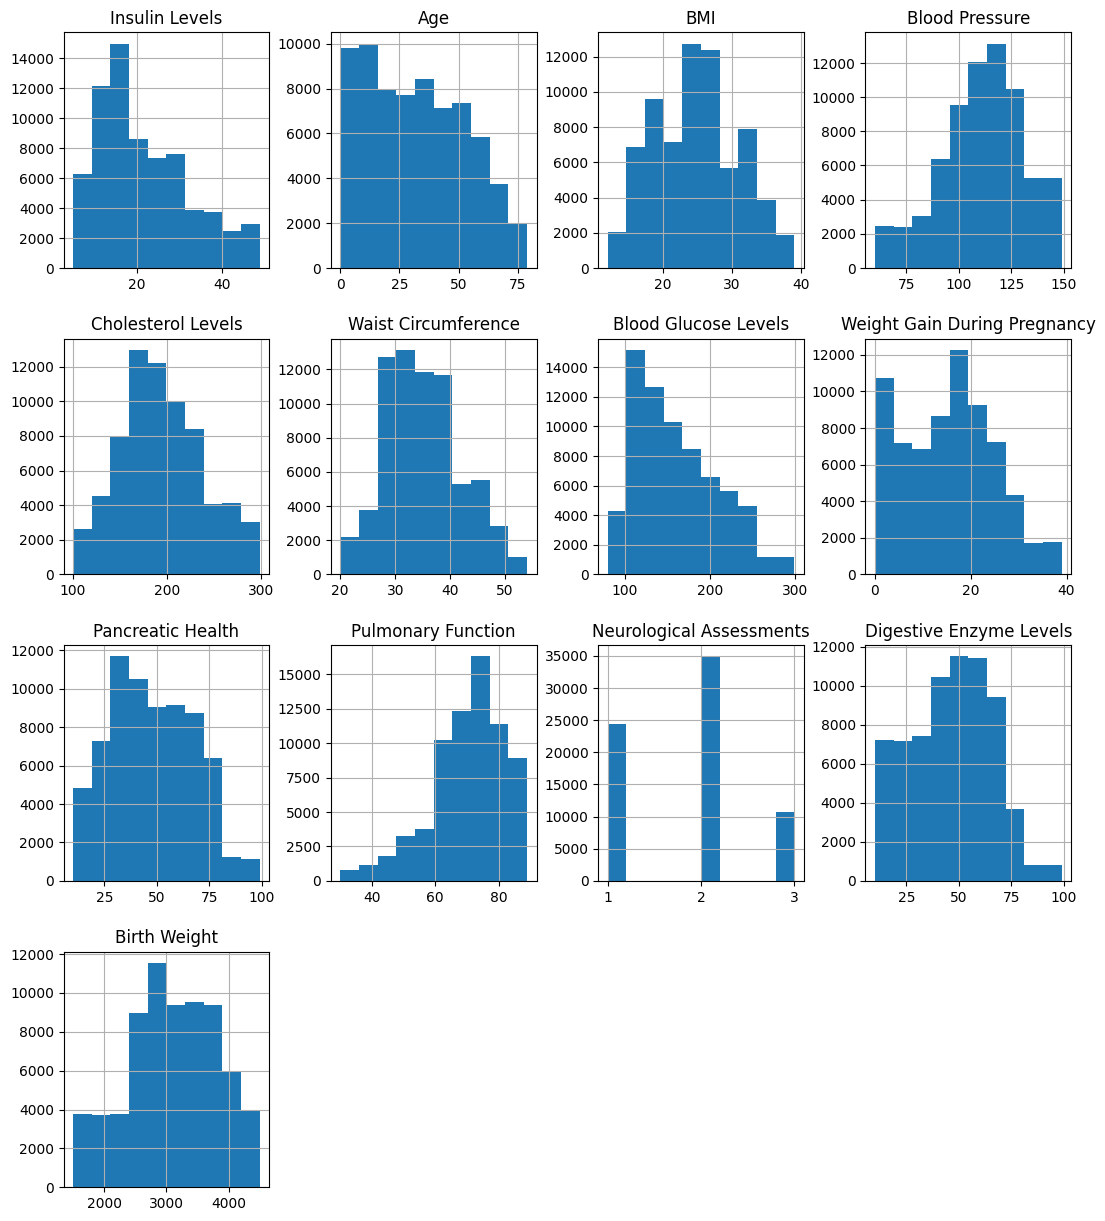

In [23]:
# Data visualization-histograms for numerical features
df.hist(figsize=(13, 15))
plt.show()

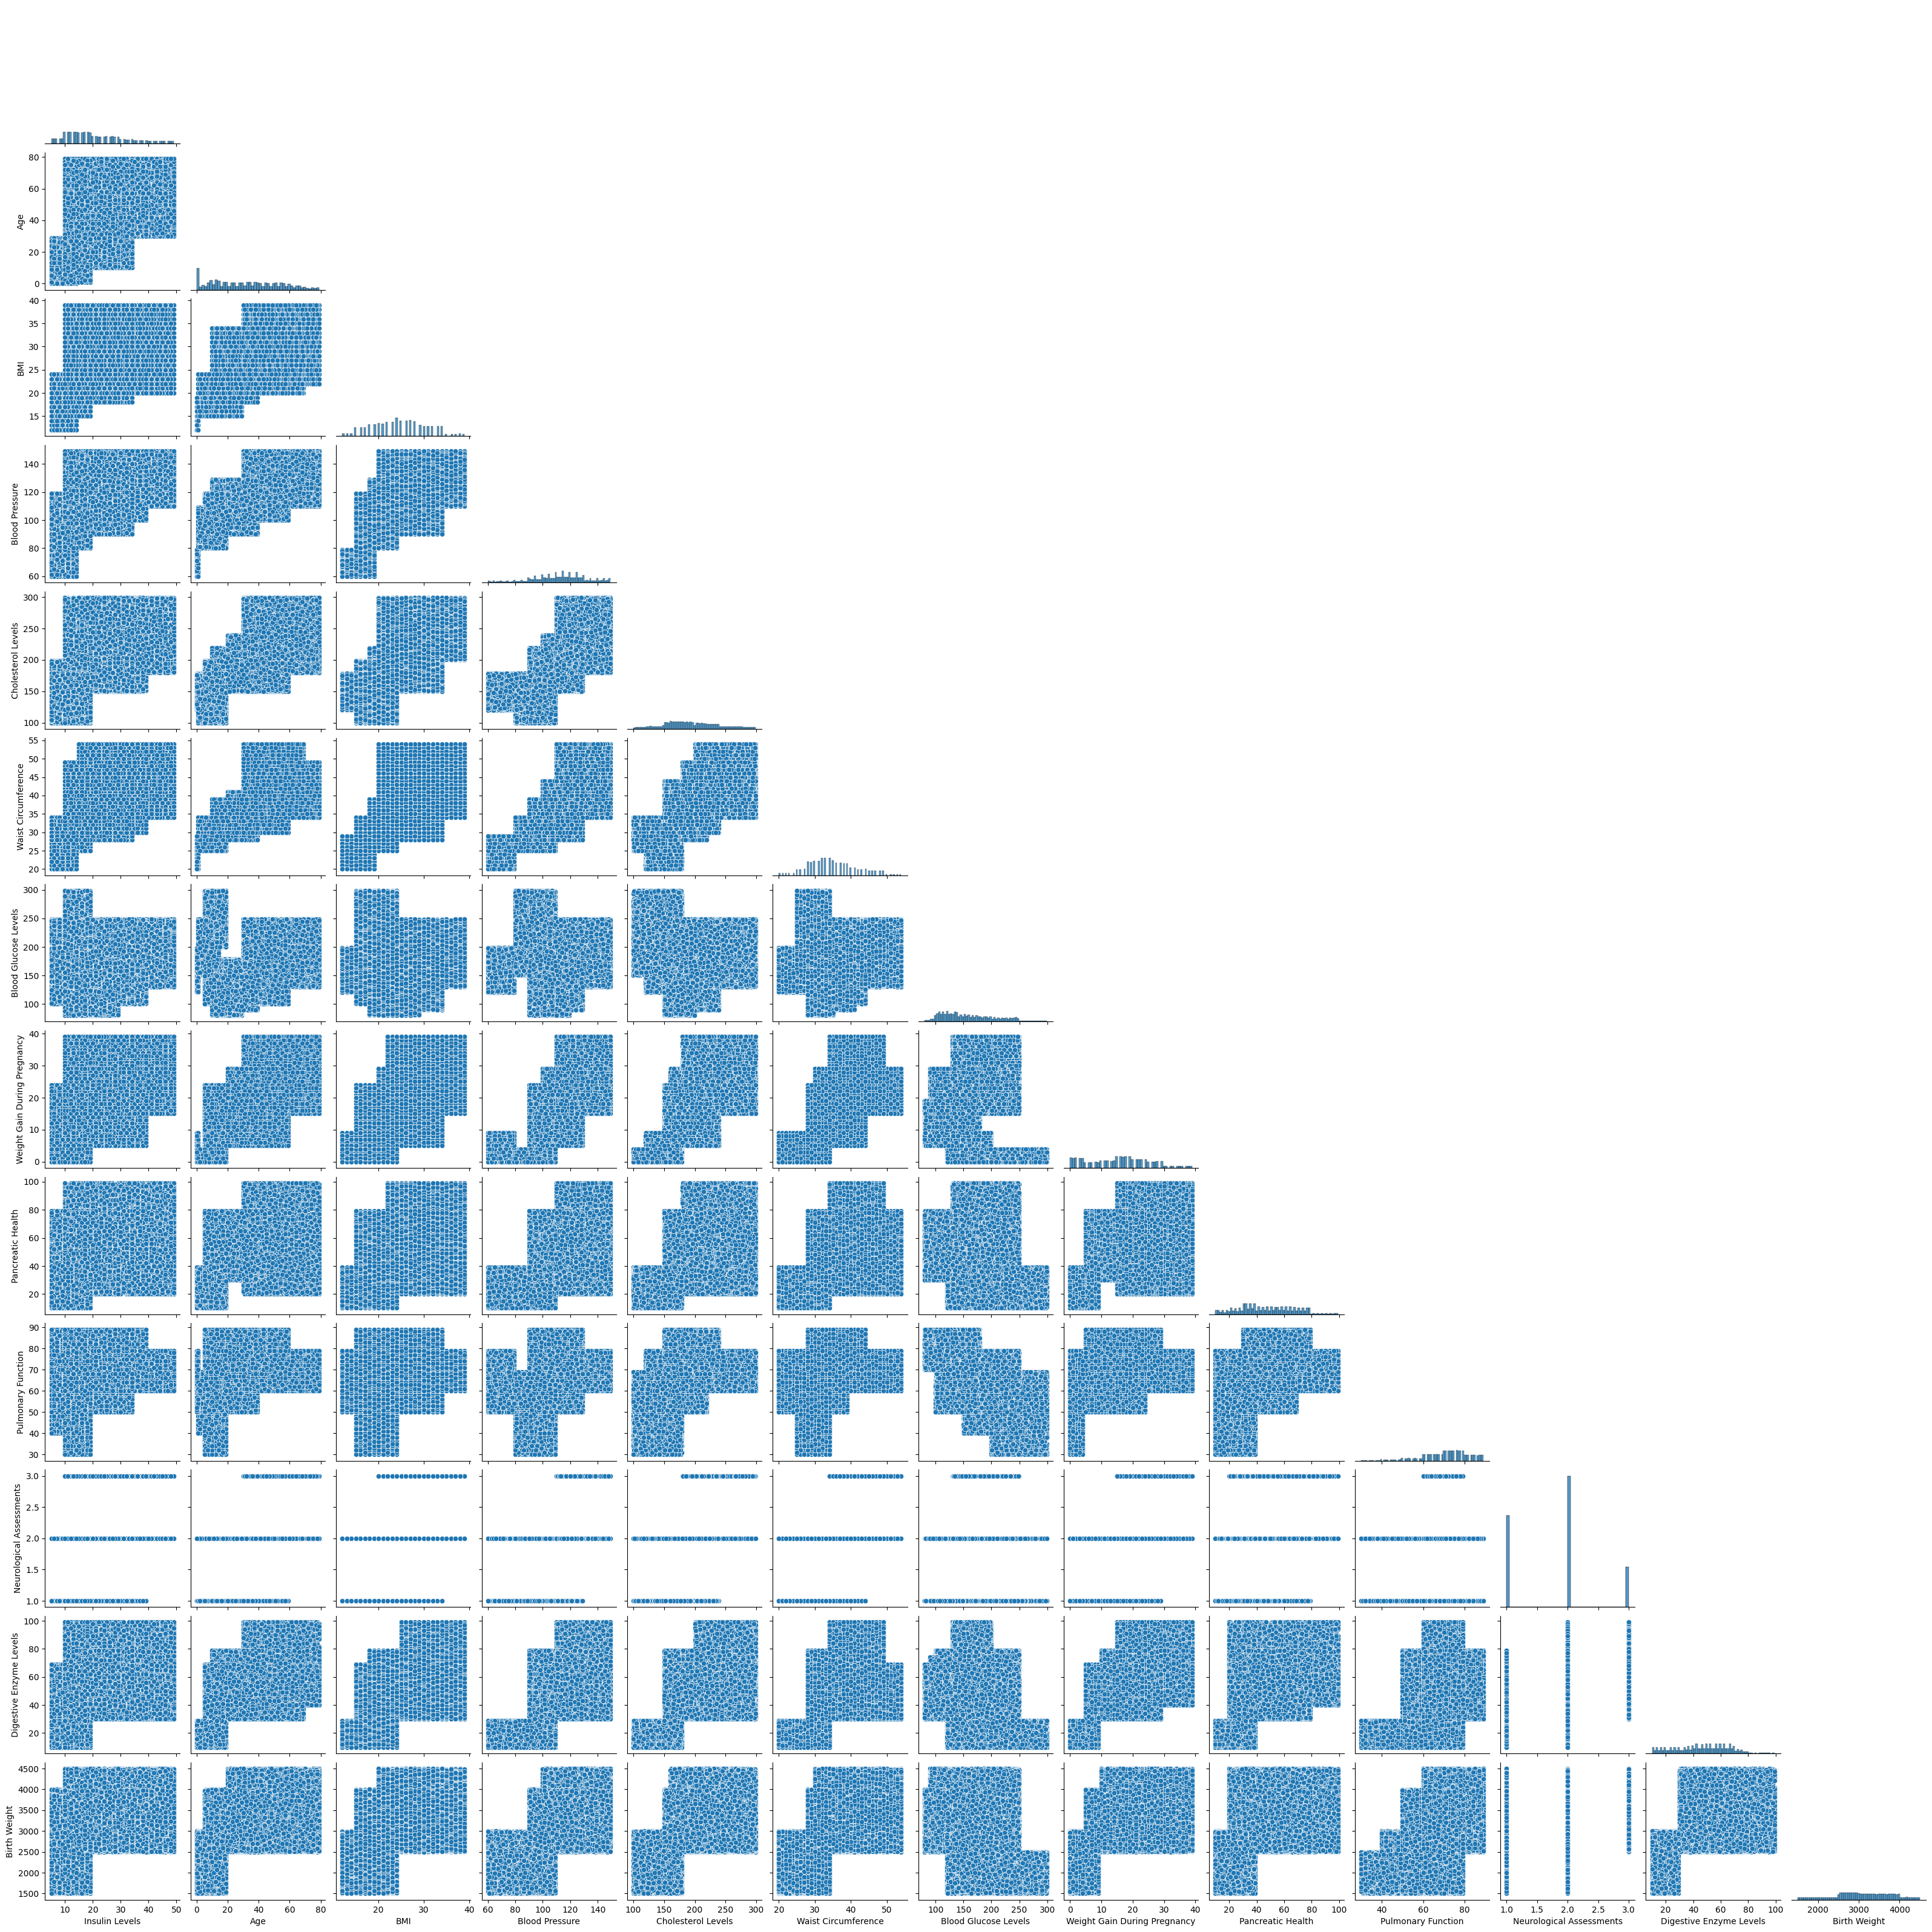

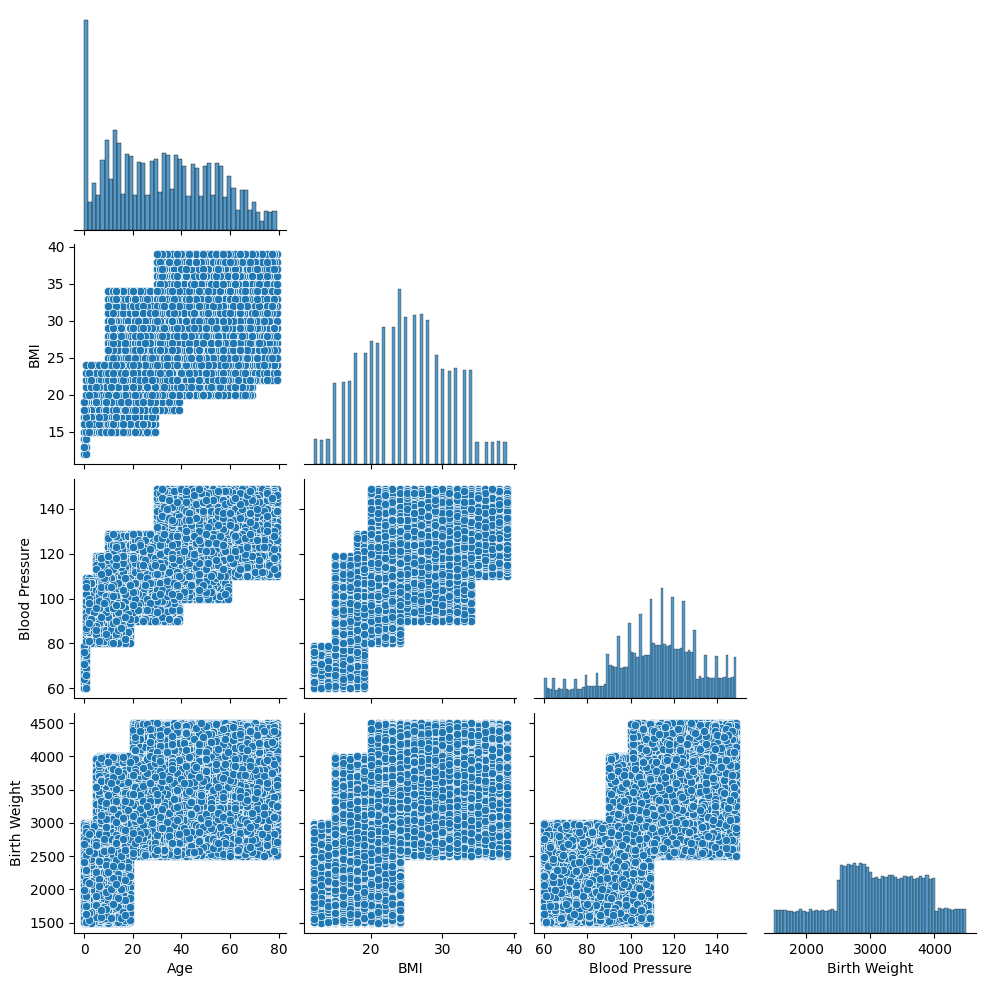

In [24]:
# Generate pair plots to explore potential relationships and distributions
sns.pairplot(df.dropna(), corner=True)
plt.show()
selected_features = ['Age', 'BMI', 'Blood Pressure','Birth Weight'] # Just 4 features
sns.pairplot(df[selected_features].dropna(), corner=True)
plt.show()

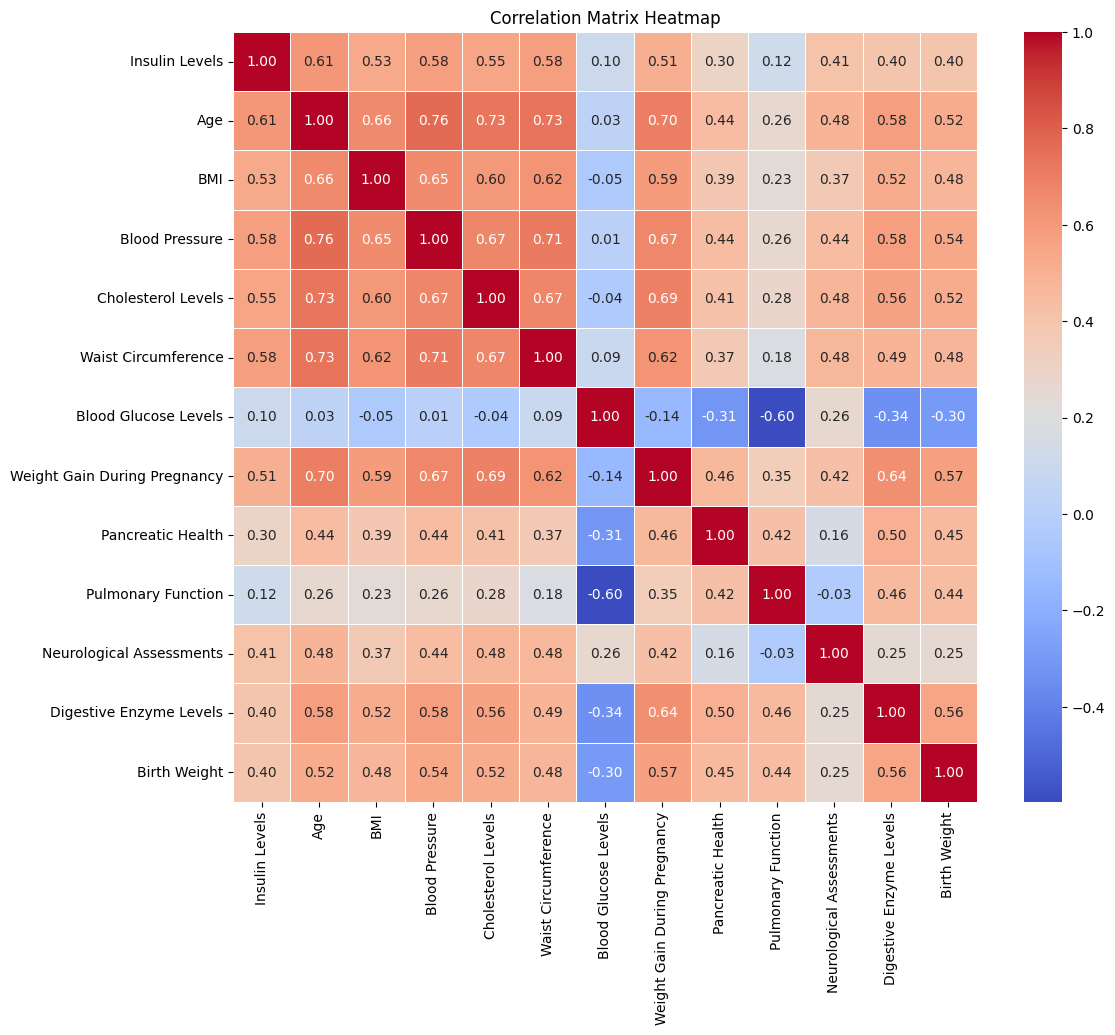

In [25]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

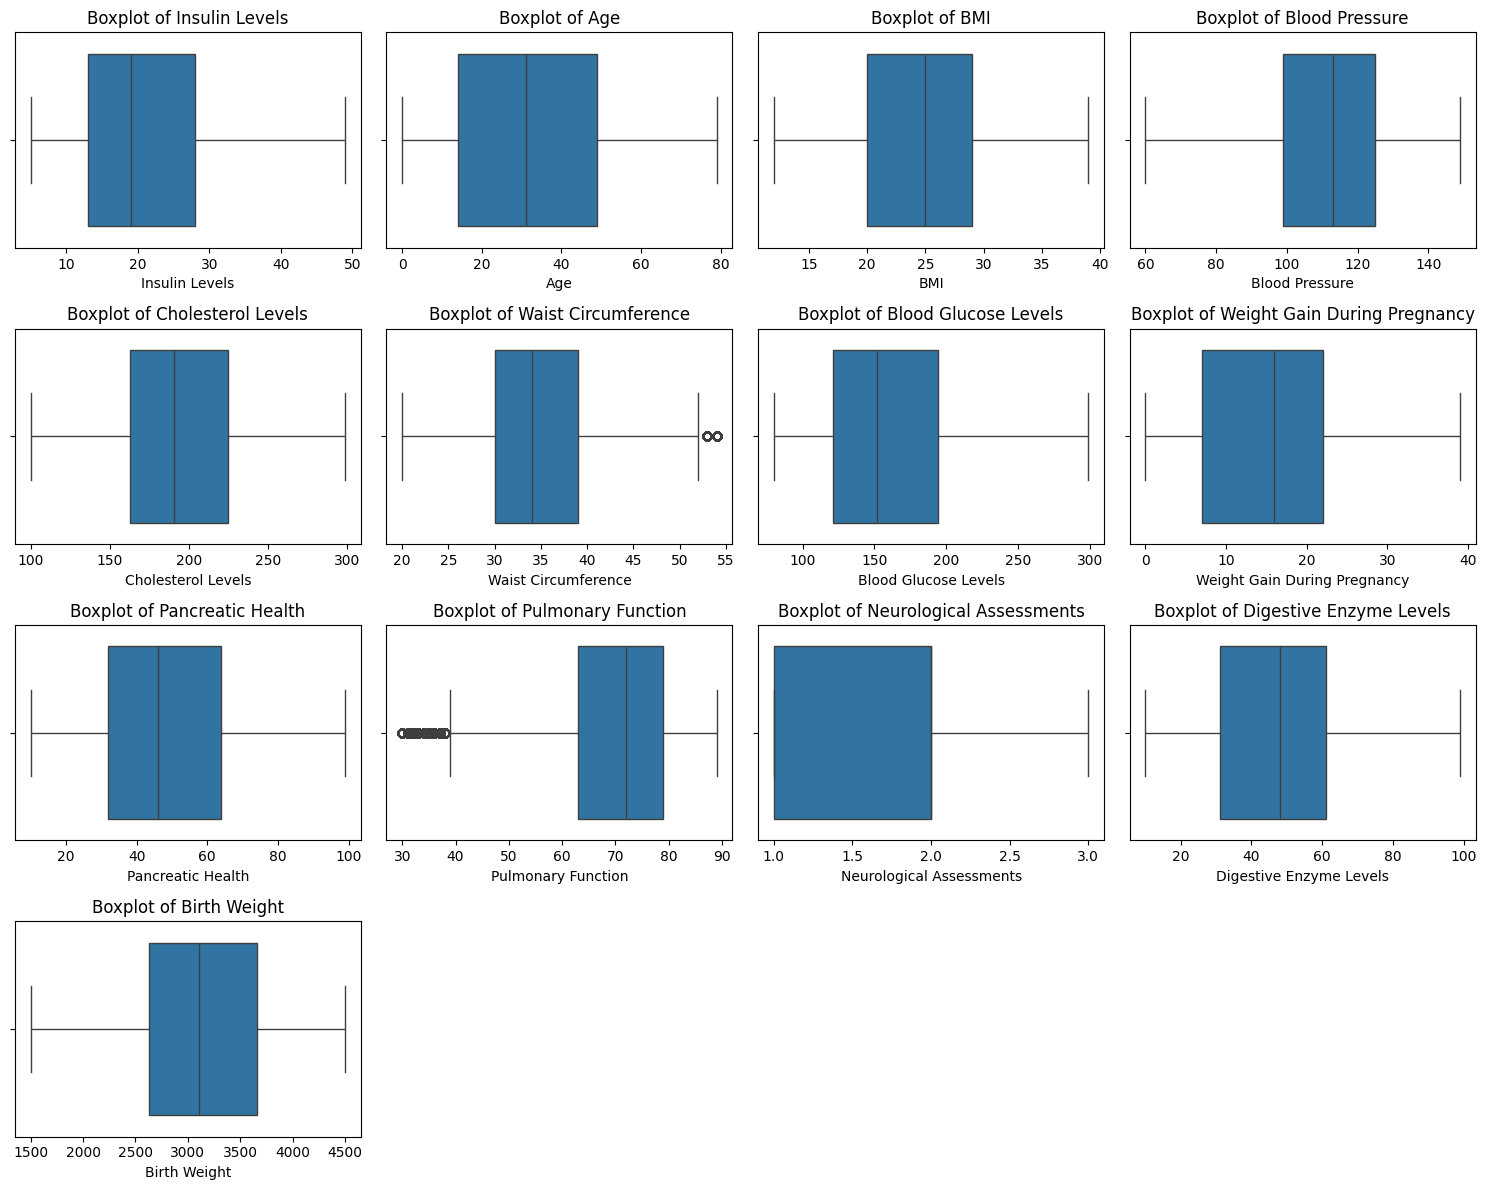

In [26]:
# Generate box plots to explore the distribution and detect outliers
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**1.4 Data Cleaning**

In [27]:
# Address missing values by imputation
imputer = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Address outliers by capping
for col in numeric_cols:
    upper_limit = df[col].quantile(0.99)
    lower_limit = df[col].quantile(0.01)
    df[col] = np.clip(df[col], lower_limit, upper_limit)

**1.5 Feature Engineering**

In [28]:
# Encode categorical columns into binary values using OneHotEncoder and create a DataFrame with the encoded features
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = df.select_dtypes(include=['object']).columns
encoded_data = encoder.fit_transform(df[categorical_cols])
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Scale numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)


# Combine all preprocessed data
df_preprocessed = pd.concat([df_scaled, df_encoded], axis=1)
print(df_preprocessed.head())

   Insulin Levels     Age     BMI  Blood Pressure  Cholesterol Levels  \
0          1.7094  0.5705  2.2121          0.6360              0.1380   
1         -0.7988 -1.4753 -1.3030         -1.9268             -1.6627   
2          0.5018  0.1899 -0.1313          0.4852             -0.2222   
3         -1.2633 -1.1899 -1.4703         -0.5700             -0.9875   
4         -0.4272 -1.0471 -1.3030         -0.4193             -1.1000   

   Waist Circumference  Blood Glucose Levels  Weight Gain During Pregnancy  \
0               2.2127                0.1530                        0.2610   
1              -1.6351                0.3616                       -0.7788   
2               0.1408               -1.1618                       -0.0509   
3              -0.8951               -0.8279                       -0.3629   
4              -0.3031                2.6155                       -1.4026   

   Pancreatic Health  Pulmonary Function  ...  \
0            -0.5800              0.4805  .

**1.6 Dimensionality Reduction**

In [29]:
# Apply PCA to reduce dimensionality while retaining 95% of the variance
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_preprocessed)

**1.7 Split the Dataset for Model Evaluation**

In [30]:
# Split the preprocessed data (with PCA)
X_train_p, X_test_p, y_train, y_test = train_test_split(df_pca, df['Target'], test_size=0.2, random_state=42)

# Split raw data for comparison
X_train_raw, X_test_raw, _, _ = train_test_split(df[numeric_cols], df['Target'], test_size=0.2, random_state=42)

**1.8 Model Training and Evaluation**

In [31]:
# Train RandomForest models on both preprocessed and raw data
model_preprocessed = RandomForestClassifier(n_estimators=100, random_state=42)
start_time_preprocessed = time.time()
model_preprocessed.fit(X_train_p, y_train)
training_time_preprocessed = time.time() - start_time_preprocessed
y_pred_p = model_preprocessed.predict(X_test_p)

# Calculate training time
model_raw = RandomForestClassifier(n_estimators=100, random_state=42)
start_time_raw = time.time()
model_raw.fit(X_train_raw, y_train)
training_time_raw = time.time() - start_time_raw
y_pred_r = model_raw.predict(X_test_raw)

**1.9 Results Comparison**

In [32]:
# Display training times
print(f"Training Time for Preprocessed Data: {training_time_preprocessed:.2f} seconds")
print(f"Training Time for Raw Data: {training_time_raw:.2f} seconds")

# Evaluate and Compare Model Performance
accuracy_preprocessed = accuracy_score(y_test, y_pred_p)
accuracy_raw = accuracy_score(y_test, y_pred_r)

print("\nPerformance on Preprocessed Data:")
print(f"Accuracy: {accuracy_preprocessed:.4f}")
print(f"Precision: {precision_score(y_test, y_pred_p, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_p, average='macro'):.4f}")

print("\nPerformance on Raw Data:")
print(f"Accuracy: {accuracy_raw:.4f}")
print(f"Precision: {precision_score(y_test, y_pred_r, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_r, average='macro'):.4f}")

print("\nSummary of Improvements Due to Preprocessing:")
print(f"Preprocessing reduced training time by {training_time_raw - training_time_preprocessed:.2f} seconds.")
print(f"Improvement in accuracy from raw to preprocessed data: {accuracy_preprocessed - accuracy_raw:.2%}")

Training Time for Preprocessed Data: 65.06 seconds
Training Time for Raw Data: 12.82 seconds

Performance on Preprocessed Data:
Accuracy: 0.8323
Precision: 0.8341
Recall: 0.8326

Performance on Raw Data:
Accuracy: 0.9005
Precision: 0.9045
Recall: 0.9008

Summary of Improvements Due to Preprocessing:
Preprocessing reduced training time by -52.24 seconds.
Improvement in accuracy from raw to preprocessed data: -6.82%


#**Part 2: Comparative Analysis of Classification Techniques**


**2.1 Import Additional Libraries**

In [33]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import warnings
from time import time

**2.2 Prepare Models**

In [34]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=300)
}

**2.3 Train and Evaluate Models**

In [35]:
warnings.filterwarnings('ignore')
results = {}

for name, model in models.items():
    start_time = time()
    model.fit(X_train_p, y_train)  # Training
    end_time = time()

    y_pred = model.predict(X_test_p)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro'),
        'Training Time': end_time - start_time
    }

# Print the results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()

Results for Random Forest:
Accuracy: 0.8323
Precision: 0.8341
Recall: 0.8326
F1 Score: 0.8326
Training Time: 64.4616

Results for SVM:
Accuracy: 0.8531
Precision: 0.8545
Recall: 0.8532
F1 Score: 0.8529
Training Time: 35.1303

Results for MLP:
Accuracy: 0.8846
Precision: 0.8855
Recall: 0.8848
F1 Score: 0.8843
Training Time: 163.3556



**2.4 Concluding the Best Model**

In [36]:
# Assign weights to Accuracy and Training Time (70% Accuracy, 30% Training Time)
balance_scores = {}
for name, metrics in results.items():
    # Normalize Accuracy and Training Time to scale them
    accuracy_normalized = metrics['Accuracy'] / max(result['Accuracy'] for result in results.values())
    time_normalized = min(result['Training Time'] for result in results.values()) / metrics['Training Time']

    # Combine the scores
    balance_scores[name] = (0.7 * accuracy_normalized) + (0.3 * time_normalized)

# Print the balance score for each model
print("Balance Scores for Each Model:")
for model_name, score in balance_scores.items():
    print(f"{model_name}: {score:.4f}")

# Determine the best-balanced model
best_balance_model = max(balance_scores, key=balance_scores.get)
print(f"\n So the model providing the best balance is {best_balance_model} with a balance score of {balance_scores[best_balance_model]:.4f}")

Balance Scores for Each Model:
Random Forest: 0.8221
SVM: 0.9751
MLP: 0.7645

 So the model providing the best balance is SVM with a balance score of 0.9751
